# 1. Logistic regression
## (a)

1)
\begin{align*}
J(\theta) &= \frac{1}{m} \sum_{k=1}^{m} \mathrm{log}(1 + e ^{-y^{(k)} \theta^T x^{(k)})})\\
          &= - \frac{1}{m} \sum_{k=1}^{m} \mathrm{log}(g(z^{(k)})) \\
\end{align*}
2)
We have $\frac{\partial g}{\partial z}= g(1 - g)$, thus
\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_i} &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z)} \frac{\partial g(z)}{\partial z} \frac{\partial z}{\partial \theta_i}\\
          &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z)} g(z)(1-g(z)) y^{(k)} x_i^{(k)} \\
          &= -\frac{1}{m} \sum_{k=1}^{m} (1-g(z)) y^{(k)} x_i^{(k)} \\
\end{align*}
3) Then
\begin{align*}
H_{ij} = \frac{\partial^2 J(\theta)}{\partial\theta_i \partial\theta_j} &= -\frac{1}{m} \sum_{k=1}^{m}  \frac{\partial (1 - g(z))}{\partial z} \frac{\partial z}{\partial \theta_j} y^{(k)} x_i^{(k)}\\
          &= \frac{1}{m} \sum_{k=1}^{m} g(z)(1-g(z)) y^{(k)} x_i^{(k)} y^{(k)} x_j^{(k)} \\
          &= \frac{1}{m} \sum_{k=1}^{m} g(z)(1-g(z)) x_i^{(k)} x_j^{(k)} \\
\end{align*}
4) Finally
\begin{align*}
z^THz &= \sum_{i=1}^{n} \sum_{j=1}^{n} z_i H_{ij} z_j \\
      &= \sum_{i=1}^{n} \sum_{j=1}^{n} z_i (\frac{1}{m} \sum_{k=1}^{m} g(z)(1-g(z)) x_i^{(k)} x_j^{(k)}) z_j \\
      & = \frac{1}{m} \sum_{k=1}^{m} g(z)(1-g(z)) \sum_{i=1}^{n} \sum_{j=1}^{n} z_i x_i^{(k)} x_j^{(k)} z_j 
\end{align*}
Since $ 0<g(z)<1 $ and $ \sum_{i=1}^{n} \sum_{j=1}^{n} z_i x_i^{(k)} x_j^{(k)} z_j =  ((x^{(k)})^{T}z)^2 $,  
$z^T H z \ge 0$, so $H$ is PSD, i.e. $H \succeq 0$.

PS: $\sum_{i=1}^{n} \sum_{j=1}^{n} z_i x_i x_j z_j$
\begin{align*}
\sum_{i=1}^{n} \sum_{j=1}^{n} z_i x_i x_j z_j &= \sum_{i=1}^{n} \sum_{j=1}^{n} z_i x_j z_j x_i \\
                                              &= \sum_{i=1}^{n} (zx^T  zx^T)_{ii} \\
                                              &= tr(z x^T z x^T) \\
                                              &= tr(x^T z x^T z) \\
                                              &= tr((x^Tz)^2) \\
                                              &= (x^Tz)^2
\end{align*}

## (b)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

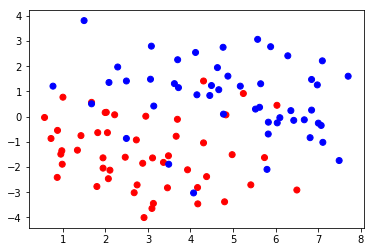

In [2]:
df_X = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_x.txt', sep='\ +', header=None, engine='python')
df_y = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_y.txt', sep='\ +', header=None, engine='python')
Xs = df_X.values
y = df_y.values
colors = ['blue' if i == 1 else 'red' for i in y ]
plt.scatter(Xs[:,0], Xs[:,1], c=colors)
plt.show()

Update rules:   
\begin{align*}
\theta :&= \theta - H^{-1} \nabla_{\theta} J(\theta) \\
\frac{\partial J(\theta)}{\partial \theta_i} &=  -\frac{1}{m} \sum_{k=1}^{m} (1-g(z)) y^{(k)} x_i^{(k)} \\
H_{ij} &= \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1-g(z^{(k)})) x_i^{(k)} x_j^{(k)} \\
\end{align*}

            

In [3]:
#Add the intercept term
X = np.hstack([np.ones((Xs.shape[0], 1)), Xs])

m = X.shape[0]
n = X.shape[1]

all_thetas = [] 
tol = 1e9
n_iters = 0
theta = np.zeros((n, 1))

while tol > 1e-6:
    z = np.dot(X, theta) * y
    gz = sigmoid(z)
    
    #nabla
    nabla = np.mean((gz - 1) * y * X, axis = 0).reshape(-1,1)
    
    #Hessian
    hessian = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            hessian[i, j] = np.mean(gz * (1 - gz) * X[:,i].reshape(-1,1) * X[:,j].reshape(-1,1))
            if i != j :
                hessian[j, i] = hessian[i, j]
                
    #Delta
    delta = np.matmul(np.linalg.inv(hessian), nabla)
    theta -= delta
    all_thetas.append(theta.copy())
    
    n_iters += 1
    tol = np.sum(np.abs(delta))
    
print('converged after {0} iterations'.format(n_iters))

converged after 7 iterations


## (c)

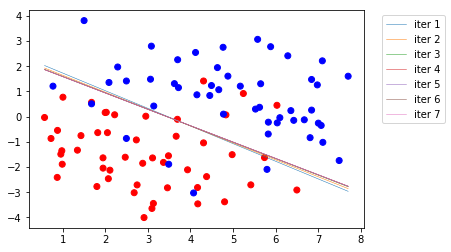

In [7]:
plt.scatter(X[:,1], X[:,2], c=colors)
_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
for k, theta in enumerate(all_thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

# 2. Poisson regression and the exponential family

## (a)
\begin{align*}
p(y; \lambda) &= \frac{e^{-\lambda}\lambda^y}{y!} \\
          &= \frac{1}{y!} e^{log^{\lambda}y - \lambda}\\
\end{align*}

Thus we have:
\begin{align*}
p(y; \eta) &= (\frac{1}{y!}) e^{\eta y - (e^\eta)}\\
           &= b(y)exp(\eta T(y) - a(\eta))
\end{align*}

Where:  
\begin{align*}
\eta &= log^\lambda \\
T(y) &= y \\
a(\eta) &= e^\eta \\
b(y) &= \frac{1}{y!}
\end{align*}

## (b)
Canonical response function:
\begin{align*}
g(\eta) &= E[T(y);\eta] \\
        &= \lambda \\
        &= e^\eta \\
        &= e^{\theta^Tx} \\
\end{align*}

## (c)
Log-likelihood:
\begin{align*}
l(\theta) &= log(p(y; \lambda)) \\
          &= log\frac{1}{y!} + ylog^\lambda - \lambda \\
          &= log\frac{1}{y!} + y\eta - e^\eta \\
          &= log\frac{1}{y!} + y\theta^Tx - e^{\theta^Tx}
\end{align*}

Its derivative:
\begin{align*}
\frac{\partial l(\theta)}{\partial \theta_j} &= y x_j - e^{\theta^T x} x_j \\
                                             &= (y - e^{\theta^T x}) x_j \\
                                             &= (y - e^{\eta}) x_j \\
                                             &= (y - \lambda) x_j
\end{align*}

Stochastic gradient descent rule:
\begin{align*}
\theta &:= \theta + \alpha  \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - e^{\theta^T x^{(i)}})x^{(i)}
\end{align*}

## (d)
### d.1 Log-likelihood
Since T(y) = y, thus:
\begin{align*}
p(y;\eta) &= b(y)exp(\eta y-a(\eta)) \\
\end{align*}

\begin{align*}
l(\theta) &= log(p(y; \eta)) \\
          &= log^{b(y)} + \eta y-a(\eta) \\
\end{align*}

### d.2 Derivative 
\begin{align*}
\frac{\partial l(\theta)}{\partial \theta_j} &= 0 + y \frac{\partial \eta}{\partial \theta_j} - \frac{\partial a(\eta)}{\partial \eta} \frac{\partial \eta}{\partial \theta_j} \\
                                             &= (y - \frac{\partial a(\eta)}{\partial \eta}) x_j \\
\end{align*}

### d.3 Canonical response function
$$ \int_{y}p(y;\eta) dy = 1 $$
Taking derivative on both side w.s.t $\eta$
$$ \frac{d}{d \eta}\int_{y}p(y;\eta) dy = 0 $$
$$ \int_{y} \frac{d}{d \eta} p(y;\eta) dy = 0 $$
Thus we have:
\begin{align*}
\int_{y} \frac{d}{d \eta} p(y;\eta) dy &= \int_{y} b(y)exp(\eta y-a(\eta))(y - \frac{\partial a(\eta)}{\partial \eta})dy \\
                                       &= \int_{y} p(y;\eta)(y - \frac{\partial a(\eta)}{\partial \eta})dy \\
                                       &= \int_{y} p(y;\eta)ydy - \frac{\partial a(\eta)}{\partial \eta}\int_{y}p(y;\eta)dy \\
                                       &= h(x) - \frac{\partial a(\eta)}{\partial \eta}1 \\
                                       &= h(x) - \frac{\partial a(\eta)}{\partial \eta} \\
                                       &= 0 \\
\end{align*}

Therefore: $$ h(x) = \frac{\partial a(\eta)}{\partial \eta} $$
And: $$ \frac{\partial l(\theta)}{\partial \theta_j} = (y - h(x))x_j $$

### d.4 Stochastic gradient ascent rule
\begin{align*}
\theta_j &:= \theta_j + \alpha(y - h(x))x_j \\
         &:= \theta_j - \alpha(h(x) - y)x_j \\
\end{align*}

# 3.  Gaussian discriminant analysis 

## (a)
Given:
\begin{align*} 
p(y) &= \begin{cases}
  \phi          & \text{if} \; y = 1 \\
  1 - \phi     & \text{if} \; y = -1
\end{cases} \\
p(x|y=1) &= \frac{1}{(2\pi)^{\frac{n}{2}} \left|\Sigma\right|^{\frac{1}{2}}} \mathrm{exp}\bigg(-\frac{1}{2}(x - \mu_{1})^T \Sigma^{-1} (x - \mu_{1}) \bigg) \\
p(x|y=-1) &= \frac{1}{(2\pi)^{\frac{n}{2}} \left|\Sigma\right|^{\frac{1}{2}}} \mathrm{exp}\bigg(-\frac{1}{2}(x - \mu_{-1})^T \Sigma^{-1} (x - \mu_{-1}) \bigg) \\
\end{align*}

Suppose:
\begin{align*}
p(x|y=1) &= Ce^A \\
p(x|y=-1) &= Ce^B \\
\end{align*}
Where:
\begin{align*}
A &= -\frac{1}{2}(x - \mu_{1})^T \Sigma^{-1} (x - \mu_{1}) \\
B &= -\frac{1}{2}(x - \mu_{-1})^T \Sigma^{-1} (x - \mu_{-1}) \\
C &= \frac{1}{(2\pi)^{\frac{n}{2}} \left|\Sigma\right|^{\frac{1}{2}}}
\end{align*}

\begin{align*}
p(y|x) &= \frac{p(x|y)p(y)}{p(x)} \\
       &= \frac{p(x|y)p(y)}{p(x|y=1)p(y=1) + p(x|y=-1)p(y=-1)} \\
\end{align*}

When y = 1:
\begin{align*}
p(y|x) &= \frac{Ce^A\phi}{Ce^A\phi + Ce^B(1-\phi)} \\
       &= \frac{1}{1 + \frac{1-\phi}{\phi}e^{B-A}} \\
       &= \frac{1}{1 + e^{(B-A+log^{1-\phi}-log^\phi)}} \\
       &= \frac{1}{1 + e^{-(A-B+log^\phi-log^{1-\phi})}} \\
       &= \frac{1}{1 + e^{-y(A-B+log^\phi-log^{1-\phi})}} \\
\end{align*} 

When y = -1:
\begin{align*}
p(y|x) &= \frac{Ce^B(1-\phi)}{Ce^A\phi + Ce^B(1-\phi)} \\
       &= \frac{1}{1 + \frac{\phi}{1-\phi}e^{A-B}} \\
       &= \frac{1}{1 + e^{(A-B+log^\phi-log^{1-\phi})}} \\
       &= \frac{1}{1 + e^{-y(A-B+log^\phi-log^{1-\phi})}} \\
\end{align*} 
Therefore in both cases:
\begin{align*}
p(y|x) &= \frac{1}{1 + e^{-y(A-B+log^\phi-log^{1-\phi})}} \\
       &= \frac{1}{1 + e^{-y(\theta^Tx+\theta_0)}}
\end{align*} 
Where:
\begin{align*}
\theta^Tx+\theta_0 &=  A-B+log^\phi-log^{1-\phi} \\
                   &= \frac{1}{2}(x - \mu_{-1})^T \Sigma^{-1} (x - \mu_{-1}) -\frac{1}{2}(x - \mu_{1})^T \Sigma^{-1} (x - \mu_{1})  + log^\phi - log^{1 - \phi} \\
\end{align*} 

## (b)
Since x is of one dimension:
\begin{align*} 
p(y) &= \begin{cases}
  \phi          & \text{if} \; y = 1 \\
  1 - \phi     & \text{if} \; y = -1
\end{cases} \\
p(x|y=1) &= \frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}} \mathrm{exp}\bigg(-\frac{(x - \mu_{1})^2}{2\sigma^2} \bigg) \\
p(x|y=-1) &= \frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}} \mathrm{exp}\bigg(-\frac{(x - \mu_{-1})^2}{2\sigma^2}  \bigg) \\
\end{align*}

Log-likelihood:
\begin{align*} 
l(\phi, \mu_{1}, \mu_{-1}, \sigma^2)
    &= \mathrm{log} \prod_{i=1}^{m} p(x^{(i)}, y^{(i)}; \phi, \mu_{-1}, \mu_1, \sigma^2) \\
    &= \mathrm{log} \prod_{i=1}^{m} p(x^{(i)}|y^{(i)}; \phi, \mu_{-1}, \mu_1, \sigma^2) p(y^{(i)}; \phi) \\
    &= \mathrm{log} \prod_{i=1}^{m} 1\{y^{(i)} = 1\}  \frac{1}{(2\pi \sigma^2)^{\frac{1}{2}}} \mathrm{exp}\bigg(-\frac{(x^{(i)} - \mu_1)^2}{2\sigma^{2}}\bigg ) \phi + 1\{y^{(i)} = -1\} \frac{1}{(2\pi \sigma^2)^{\frac{1}{2}}} \mathrm{exp}\bigg(-\frac{(x^{(i)} - \mu_{-1})^2}{2\sigma^{2}}\bigg ) (1 - \phi) \\
    &=  -\frac{1}{2} \sum_{i=1}^m \bigg ((1\{y^{(i)} = 1\} + 1\{y^{(i)} = -1\}) log^{2\pi \sigma^2}\bigg ) - \sum_{i=1}^m 1\{y^{(i)} = 1\} \frac{(x^{(i)} - \mu_1)^2}{2\sigma^{2}} - \sum_{i=1}^m 1\{y^{(i)} = -1\} \frac{(x^{(i)} - \mu_{-1})^2}{2\sigma^{2}} + \sum_{i=1}^m 1\{y^{(i)} = 1\} \phi + \sum_{i=1}^m 1\{y^{(i)} = -1\} (1 - \phi) \\
    &= -\frac{m}{2} log^{2\pi \sigma^2} - \sum_{i=1}^m 1\{y^{(i)} = 1\} \frac{(x^{(i)} - \mu_1)^2}{2\sigma^{2}} - \sum_{i=1}^m 1\{y^{(i)} = -1\} \frac{(x^{(i)} - \mu_{-1})^2}{2\sigma^{2}} + (\sum_{i=1}^m 1\{y^{(i)} = 1\})  \mathrm{log}^\phi + (\sum_{i=1}^m 1\{y^{(i)} = -1\}) \mathrm{log}^{1 - \phi} \\
\end{align*}

ML estimate of $\phi$:
\begin{align*}
\frac{\partial l}{\partial \phi} &= \frac{\sum_{i=1}^m 1\{y^{(i)} = 1\}}{\phi} - \frac{\sum_{i=1}^m 1\{y^{(i)} = -1\}} {1 - \phi} \\
&= 0 \\
\end{align*}
Thus:
\begin{align*}
\sum_{i=1}^m 1\{y^{(i)} = 1\} - (\sum_{i=1}^m 1\{y^{(i)} = 1\} + \sum_{i=1}^m 1\{y^{(i)} = -1\}) \phi &= 0 \\
\sum_{i=1}^m 1\{y^{(i)} = 1\} - m\phi &= 0 \\
\phi = \frac{1}{m}\sum_{i=1}^m 1\{y^{(i)} = 1\}
\end{align*}

ML estimate of $\mu_1$:
\begin{align*}
\frac{\partial l}{\partial \mu_1} &= \frac{1}{\sigma ^2} \bigg ( \sum_{i=1}^m 1\{y^{(i)} = 1\} x^{(i)} -  \sum_{i=1}^m 1\{y^{(i)} = 1\} \mu_1 \bigg)  \\
 &= 0 \\
\end{align*}
Thus:
\begin{align*}
\sum_{i=1}^m 1\{y^{(i)} = 1\} x^{(i)} -  \sum_{i=1}^m 1\{y^{(i)} = 1\} \mu_1    &= 0 \\
\mu_1 = \frac{\sum_{i=1}^m 1\{y^{(i)} = 1\} x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)} = 1\}}
\end{align*}
By the same way we have:
$$ \mu_{-1} = \frac{\sum_{i=1}^{m} 1\{y^{(i)} = -1\}  x^{(i)}}{\sum_{i=1}^{m} 1\{y^{(i)} = -1\}}$$

ML estimate of  $\Sigma$ :
\begin{align*}
\frac{\partial l}{\partial \Sigma} 
  &= -\frac{m}{2} \frac{1}{2\pi\Sigma} 2\pi - \sum_{i=1}^m 1\{y^{(i)} = 1\} \frac{(x^{(i)} - \mu_1)^2}{2} (-(\Sigma^{-2})) - \sum_{i=1}^m 1\{y^{(i)} = -1\} \frac{(x^{(i)} - \mu_{-1})^2}{2}(−(\Sigma^{-2})) \\
  &= -\frac{m}{2\Sigma} + \sum_{i=1}^m 1\{y^{(i)} = 1\} \frac{(x^{(i)} - \mu_1)^2}{2\Sigma^2} + \sum_{i=1}^m 1\{y^{(i)} = -1\} \frac{(x^{(i)} - \mu_{-1})^2}{2\Sigma^2} \\
  &= 0
\end{align*}
Thus:
\begin{align*}
\Sigma &= \frac{1}{m} \bigg( \sum_{i=1}^m 1\{y^{(i)} = 1\} (x^{(i)} - \mu_1)^2 + \sum_{i=1}^m 1\{y^{(i)} = -1\} (x^{(i)} - \mu_{-1})^2 \bigg) \\
       &= \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu_{y^{(i)}})^2 \\
       &= \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T \\
\end{align*}

## (c)


# 4. Linear invariance of optimization algorithms

## (a)
